# 코로나 전, 후 버스 승객 이용 분석 (7011 버스)

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# 윈도우의 한글 폰트 설정
plt.rc('font', family = 'Malgun Gothic')

# 시각화 그래프가 노트북 안에 보이게 하기
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

In [4]:
# 서울시 버스노선별 정류장별 시간대별 승하차 인원 정보 2019_01 - 2020_12 (2020_11 제외)
# url : http://data.seoul.go.kr/dataList/OA-12912/S/1/datasetView.do#

'''
for i in range(1,13):
    if len(str(i)) ==1: i = '0'+str(i)
    df = pd.read_csv(filename, encoding ='cp949')
'''

In [5]:
# glob 이용해서 12개 csv 파일 load후 list(bus_2019)에 추가
# glob 폴더 지정해주면, 특정 파일들을 모두 이용가능
import glob

files_2019 = glob.glob("./data/2019/*.csv")
bus_2019 = []

for filename in files_2019:
    df = pd.read_csv(filename, index_col=None, header=0,encoding ='cp949')
    bus_2019.append(df)


In [6]:
# dataframe 결합 
df_2019 = pd.concat(bus_2019, axis=0, ignore_index=True)

In [47]:
# df_2019 데이터 탐색
df_2019.shape
df_2019.head()

,사용일자,노선번호,노선명,버스정류장ARS번호,역명,승차총승객수,하차총승객수,등록일자,노선ID,표준버스정류장ID,역ID
0,20190101,100,100번(하계동~용산구청),11428,한성여객종점,10,0,20190104,NaN,NaN,NaN
1,20190101,100,100번(하계동~용산구청),11387,노원평생학습관,5,0,20190104,NaN,NaN,NaN
2,20190101,100,100번(하계동~용산구청),11373,중계역,27,1,20190104,NaN,NaN,NaN
3,20190101,100,100번(하계동~용산구청),11381,중계목화아파트4단지,110,12,20190104,NaN,NaN,NaN
4,20190101,100,100번(하계동~용산구청),11311,인덕대학,87,76,20190104,NaN,NaN,NaN


In [8]:
files_2020 = glob.glob("./data/2020/*.csv")
bus_2020 = []

for filename in files_2020:
    df = pd.read_csv(filename, index_col=None, header=0,encoding ='cp949')
    bus_2020.append(df)



In [9]:
df_20_05 = pd.read_csv('./data/mody/BUS_STATION_BOARDING_MONTH_202005.csv',index_col=None, header=0,encoding ='cp949')
df_20_06 = pd.read_csv('./data/mody/BUS_STATION_BOARDING_MONTH_202006.csv',index_col=None, header=0,encoding ='cp949')
df_20_07 =pd.read_csv('./data/mody/BUS_STATION_BOARDING_MONTH_202007.csv',index_col=None, header=0,encoding ='cp949',)

df_20_05 = df_20_05.drop('사용일자',axis=1)
df_20_05 = df_20_05.rename_axis('사용일자').reset_index()

df_20_06 = df_20_06.drop('사용일자',axis=1)
df_20_06 = df_20_06.rename_axis('사용일자').reset_index()

# df_20_07.columns
df_20_07 =df_20_07.rename(columns ={'use_dt':'사용일자',
                   'bus_route_id':'버림',
                   'bus_route_no': '노선번호', 
                   'bus_route_nm':'노선명', 
                   'bsst_ars_no':'버스정류장ARS번호', 
                   'bus_sta_nm':'역명', 
                   'ride_pasgr_num':'승차총승객수', 
                   'alight_pasgr_num':'하차총승객수', 
                   'work_dt': '등록일자'})
df_20_07 = df_20_07.drop(columns = ['버림','등록일자'])

mody_list = [df_20_05,df_20_06,df_20_07]

In [10]:
for j in mody_list:
    bus_2020.append(j)

In [11]:
# dataframe 결합 
df_2020 = pd.concat(bus_2020, axis=0, ignore_index=True)

In [12]:
df_2020.head()

,사용일자,노선번호,노선명,버스정류장ARS번호,역명,승차총승객수,하차총승객수,등록일자
0,20200101,N62,N62번(양천공영차고지~면목동차고지),04133,왕십리역,0,13,20200104.0
1,20200101,N62,N62번(양천공영차고지~면목동차고지),04136,행당1동주민센터.성동소방서,2,3,20200104.0
2,20200101,N62,N62번(양천공영차고지~면목동차고지),04186,성동교남단,0,2,20200104.0
3,20200101,N62,N62번(양천공영차고지~면목동차고지),04256,성수사거리,0,3,20200104.0
4,20200101,N62,N62번(양천공영차고지~면목동차고지),05115,국립서울병원앞,1,0,20200104.0


In [13]:
# 사용일자 dtype int -> str 변경
df_2019['사용일자'] = df_2019['사용일자'].astype('str')
df_2020['사용일자'] = df_2020['사용일자'].astype('str')

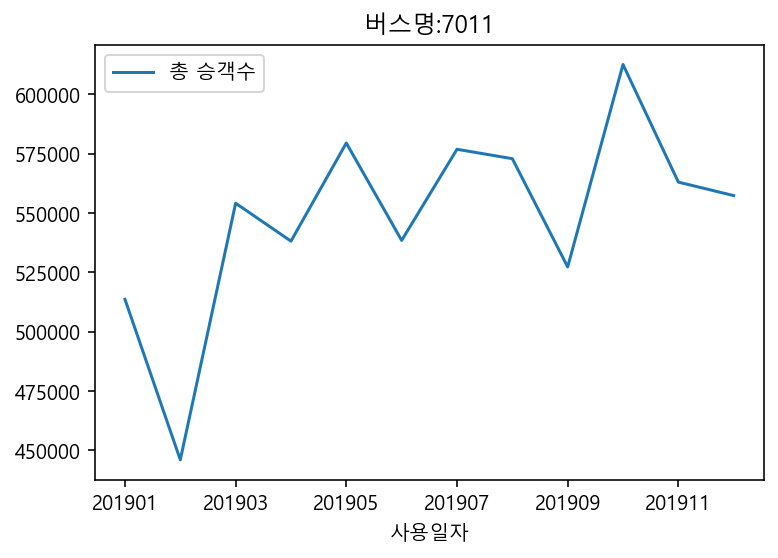

In [16]:
# bus_data_list = [df_2019, df_2020]
bus_data_list = [df_2019]

# 찾고자하는 버스의 월별 이용량 변화
busid = '7011'

for data_year in bus_data_list:
    date = []  # 사용일자 
    on =[]     # 일자별 승차 승객수
    off = []    # 일자별 하차 승객수
    all = []   # 일자별 총 승객수
    
    bus_1 = data_year[data_year['노선번호']==busid]                   # 해당 버스만 뽑아오기
    for i in range(1,10):
        YYMM = "20190{}".format(str(i))
        Bus_Of_Month = bus_1[bus_1['사용일자'].str.contains(YYMM)] # 해당 버스의 월별 버스 이용 승객 수         

        Bus_Of_Month['총 승객수'] = Bus_Of_Month['승차총승객수']+Bus_Of_Month['하차총승객수']
        
        date.append(YYMM)
        on.append(Bus_Of_Month['승차총승객수'].sum())
        off.append(Bus_Of_Month['하차총승객수'].sum())
        all.append(Bus_Of_Month['총 승객수'].sum())
        
        
    for i in range(10,13):
        YYMM = "2019{}".format(str(i))
        Bus_Of_Month = bus_1[bus_1['사용일자'].str.contains(YYMM)] # 해당 버스의 월별 버스 이용 승객 수         

        Bus_Of_Month['총 승객수'] = Bus_Of_Month['승차총승객수']+Bus_Of_Month['하차총승객수']
        
        date.append(YYMM)
        on.append(Bus_Of_Month['승차총승객수'].sum())
        off.append(Bus_Of_Month['하차총승객수'].sum())
        all.append(Bus_Of_Month['총 승객수'].sum())
        
    data = {'사용일자':date,
            '승차총승객수': on,
            '하차총승객수': off,
            '총 승객수' : all}

    # 일자별 버스 승차, 하차, 총 승객수
    bus_2019 = pd.DataFrame(data=data)
    # bus_check
    bus_2019.plot.line(x='사용일자',y='총 승객수',title='버스명:{}'.format(busid))

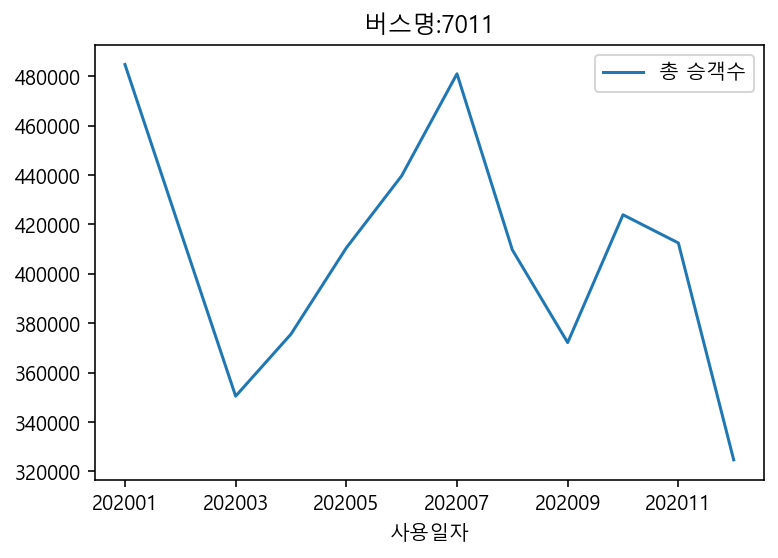

In [17]:
# bus_data_list = [df_2019, df_2020]
bus_data_list = [df_2020]

# 찾고자하는 버스의 월별 이용량 변화
busid = '7011'

for data_year in bus_data_list:
    date = []  # 사용일자 
    on =[]     # 일자별 승차 승객수
    off = []    # 일자별 하차 승객수
    all = []   # 일자별 총 승객수
    
    bus_1 = data_year[data_year['노선번호']==busid]                   # 해당 버스만 뽑아오기
    for i in range(1,10):
        YYMM = "20200{}".format(str(i))
        Bus_Of_Month = bus_1[bus_1['사용일자'].str.contains(YYMM)] # 해당 버스의 월별 버스 이용 승객 수         

        Bus_Of_Month['총 승객수'] = Bus_Of_Month['승차총승객수']+Bus_Of_Month['하차총승객수']
        
        date.append(YYMM)
        on.append(Bus_Of_Month['승차총승객수'].sum())
        off.append(Bus_Of_Month['하차총승객수'].sum())
        all.append(Bus_Of_Month['총 승객수'].sum())
        
        
    for i in range(10,13):
        YYMM = "2020{}".format(str(i))
        Bus_Of_Month = bus_1[bus_1['사용일자'].str.contains(YYMM)] # 해당 버스의 월별 버스 이용 승객 수         

        Bus_Of_Month['총 승객수'] = Bus_Of_Month['승차총승객수']+Bus_Of_Month['하차총승객수']
        
        date.append(YYMM)
        on.append(Bus_Of_Month['승차총승객수'].sum())
        off.append(Bus_Of_Month['하차총승객수'].sum())
        all.append(Bus_Of_Month['총 승객수'].sum())
        
    data = {'사용일자':date,
            '승차총승객수': on,
            '하차총승객수': off,
            '총 승객수' : all}

    # 일자별 버스 승차, 하차, 총 승객수
    bus_2020 = pd.DataFrame(data=data)
    # bus_check
    bus_2020.plot.line(x='사용일자',y='총 승객수',title='버스명:{}'.format(busid))

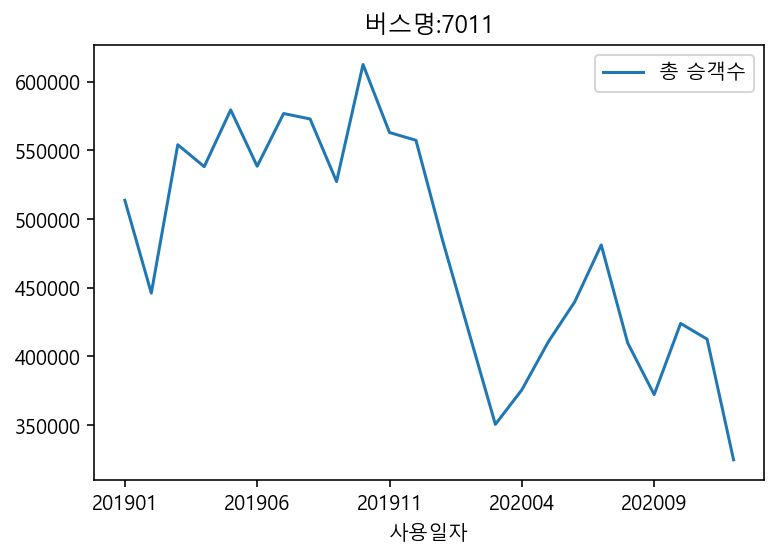

In [18]:
bus_check = pd.concat([bus_2019,bus_2020])
bus_check.plot.line(x='사용일자',y='총 승객수',title='버스명:{}'.format(busid))

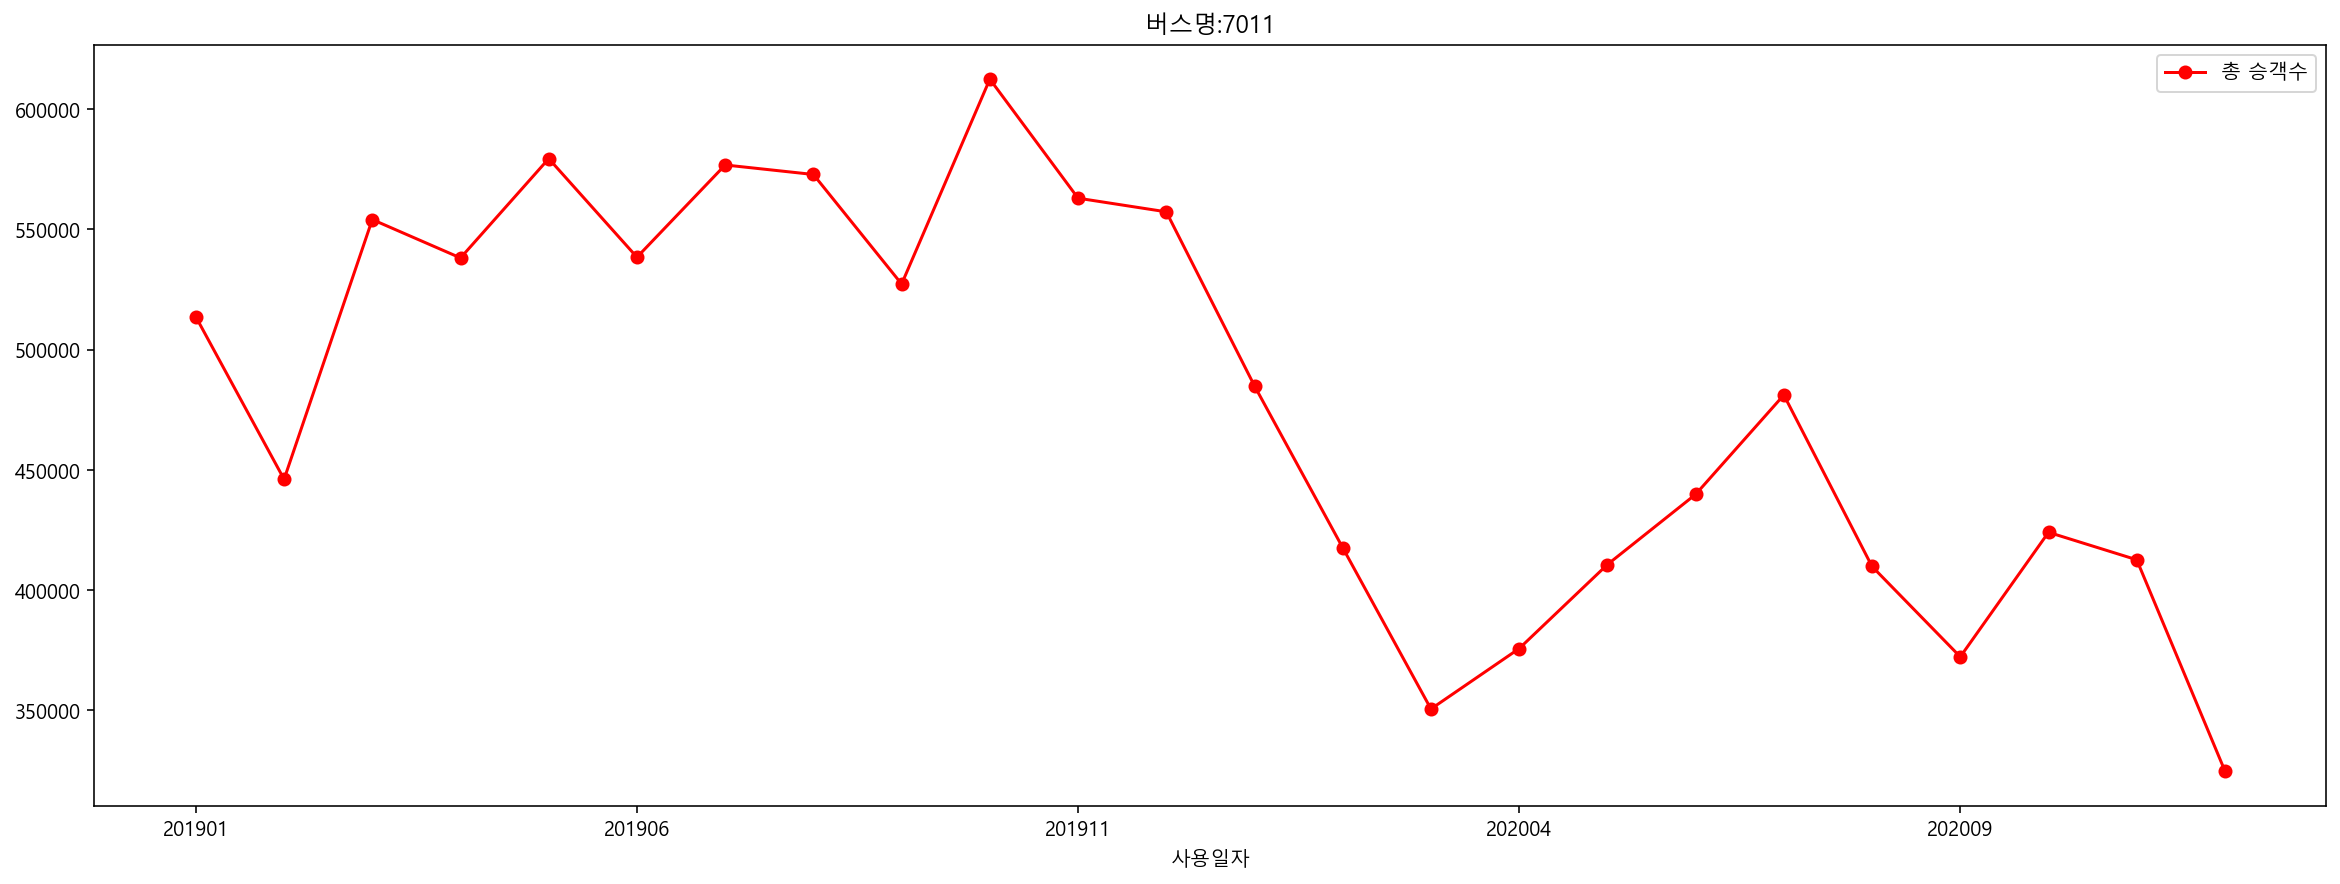

In [46]:
# listaa = ['201901','201903','201905','201907','201909','201911','202001','202003','202005','202007','202009','202011']
bus_check.plot.line(x='사용일자',y='총 승객수',title='버스명:{}'.format(busid),figsize=(20,7),style='-o',color='red')


## 결과
- 코로나가 시작 된 2020 02 이후 승객수가 급감한 것을 확인 할 수 있다.
- 그리고 4월부터 조금씩 증가했지만, 사회적 거리두기 단계가 격상함에 따라 변화하는 것을 볼 수 있다.
- 마지막으로 2020 12월에는 사회적 거리두기 3단계가 되면서 승객이 급감한 것을 확인할 수 있다.